# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2-PROJECTS/Elective Project/ExtraaLearn.csv')

## Data Overview

In [ ]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [ ]:
#changing the data type to object to bew able to analyze in different ways
df["status_Ob"] = df['status'].astype(object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
 15  stat

In [ ]:
print("Rows:" ,df.shape[0])
print("Columns: ", df.shape[1])

print("Size:" ,df.size)

Rows: 4612
Columns:  16
Size: 73792


In [ ]:
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
status_Ob                0
dtype: int64

In [ ]:
df.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
status_Ob                0
dtype: int64

In [ ]:
print("The number of duplicates in the data set is:",df.duplicated().sum())
print("The number of duplicate orders in the data set is:",df.duplicated("ID").sum())

The number of duplicates in the data set is: 0
The number of duplicate orders in the data set is: 0


**Observations:**

*  There are 4612 rows, 16 columnsand the size of the data is of 73792.
*  The data does not have any duplicates.
*  The data doesn't have Nan or missing values.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [ ]:
df.describe(exclude = 'number').T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


In [ ]:
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels',
            'referral', 'status_Ob']

num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

In [ ]:
for i in cat_cols:

    print(df[i].value_counts(normalize = True))

    print('*' * 40)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******

**observations:**

*   The average age of the leads is 65.2 years that ranges from 18 to 63. Leads have a wide range, being heavy on the older spectrum.
*   Current ocupation has three possible options of which professional has the mmos items with 2616.
*   only 29.9% of the leads are converted to paying customers


---









### Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [ ]:
# Set style
sns.set_style("whitegrid")

# Adjust figure size
plt.figure(figsize=(3, 3))

# Set fonts
sns.set(font='DejaVu Sans')

# Customize color palette
sns.set_palette("husl")

<Figure size 300x300 with 0 Axes>

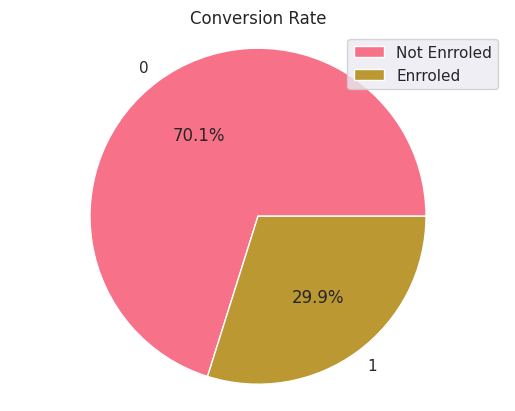

In [ ]:
status_pie = df['status_Ob'].value_counts()

plt.pie(status_pie, labels=status_pie.index, autopct='%1.1f%%', startangle=0)
plt.legend(labels=['Not Enrroled', 'Enrroled'], loc='best')
plt.title('Conversion Rate')
plt.axis('equal')
plt.show()

**Observation:** 29.9% of the leads are converted to paying customers.

## **1- Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.**

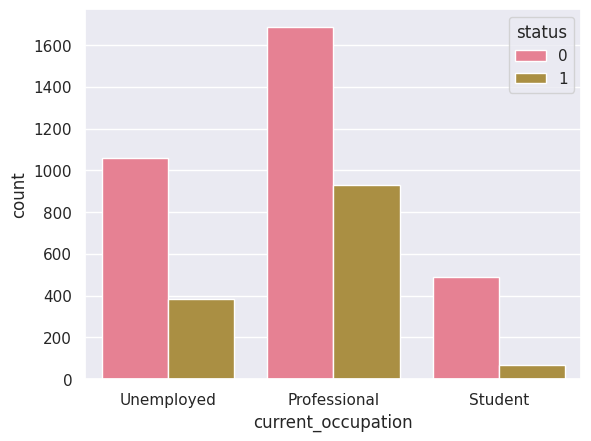

In [ ]:
sns.countplot(df,x='current_occupation', hue="status")
plt.show()

In [ ]:
#parting the data to analyze ot independently
unemployed_df = df[df["current_occupation"]=="Unemployed"]
professional_df = df[df["current_occupation"]=="Professional"]
student_df = df[df["current_occupation"]=="Student"]

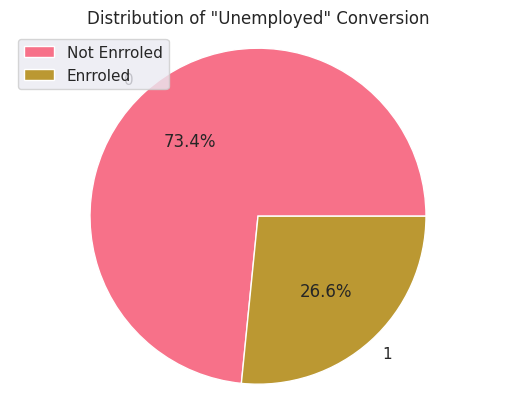

In [ ]:
unemployed_pie = unemployed_df['status_Ob'].value_counts()

plt.pie(unemployed_pie, labels=unemployed_pie.index, autopct='%1.1f%%', startangle=0)
plt.legend(labels=['Not Enrroled', 'Enrroled'], loc='best')
plt.title('Distribution of "Unemployed" Conversion')
plt.axis('equal')

plt.show()


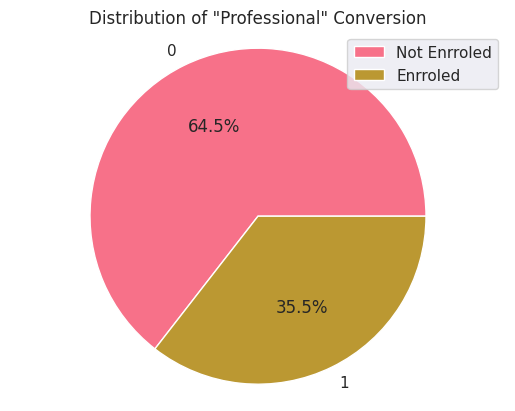

In [ ]:
professional_pie = professional_df['status_Ob'].value_counts()

plt.pie(professional_pie, labels=professional_pie.index, autopct='%1.1f%%', startangle=0)
plt.legend(labels=['Not Enrroled', 'Enrroled'], loc='best')
plt.title('Distribution of "Professional" Conversion')
plt.axis('equal')
plt.show()

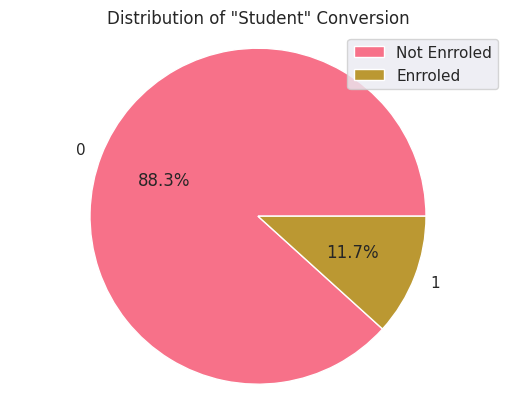

In [ ]:
student_pie = student_df['status_Ob'].value_counts()

plt.pie(student_pie, labels=student_pie.index, autopct='%1.1f%%', startangle=0)
plt.legend(labels=['Not Enrroled', 'Enrroled'], loc='best')
plt.title('Distribution of "Student" Conversion')
plt.axis('equal')
plt.show()

**Observation:** The lead status has the best conversion coming from the "professional" current occupation with 35.5% conversion rate, followed by the "unemployed" with a 26.6% conversion rate and with less than half of the unemployed, the "students" come in at 11.7% conversion rate.

## **2- The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?**

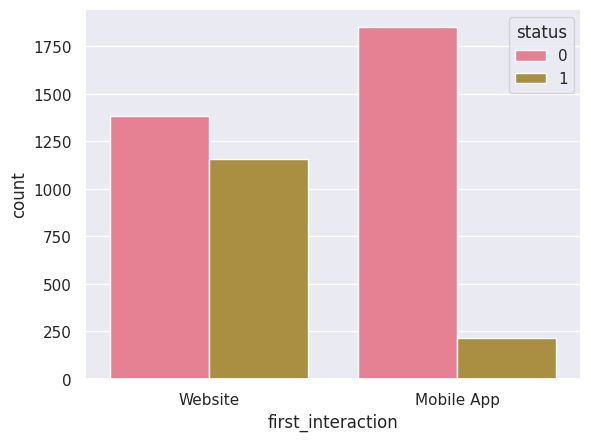

In [ ]:
sns.countplot(df,x='first_interaction',hue="status")
plt.show()

In [ ]:
pivot_table = df.pivot_table(index='first_interaction', columns='status', values='ID', aggfunc='count',margins=True, margins_name='Total')

print(pivot_table)

status                0     1  Total
first_interaction                   
Mobile App         1852   218   2070
Website            1383  1159   2542
Total              3235  1377   4612


**Observation:**
The data shows us that the conversion rate is significantly higher than the lead's first interaction is via the website versus the mobile app.

## **3- The company uses multiple modes to interact with prospects. Which way of interaction works best?**

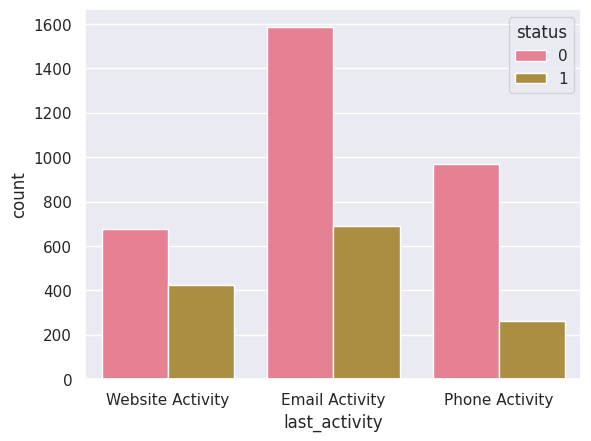

In [ ]:
sns.countplot(df,x='last_activity',hue="status")
plt.show()

In [ ]:
pivot_table = df.pivot_table(index='last_activity', columns='status', values='ID', aggfunc='count',margins=True, margins_name='Total')

print(pivot_table)

status               0     1  Total
last_activity                      
Email Activity    1587   691   2278
Phone Activity     971   263   1234
Website Activity   677   423   1100
Total             3235  1377   4612


In [ ]:
#part data to better analyze it
email_df = df[df["last_activity"]=="Email Activity"]
phone_df = df[df["last_activity"]=="Phone Activity"]
website_df = df[df["last_activity"]=="Website Activity"]

In [ ]:
#percentage of email converts
email_df["status"].value_counts()/email_df.shape[0]

0    0.696664
1    0.303336
Name: status, dtype: float64

In [ ]:
#percentage of phone converts
phone_df["status"].value_counts()/phone_df.shape[0]

0    0.786872
1    0.213128
Name: status, dtype: float64

In [ ]:
#percentage of website converts
website_df["status"].value_counts()/website_df.shape[0]

0    0.615455
1    0.384545
Name: status, dtype: float64

**Observation:**
We can see that the higher number of lead conversion is via email with 691 conversions to paying customers, however the conversion rate is lower via email with 30.3% than the conversion of the website's activity with 38.4%.

## **4- The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?**

In [ ]:
#var for categorical columns
#percentage of leads from various channels

cat_cols1 = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels',
            'referral', 'status_Ob']
for i in cat_cols1:

    print(df[i].value_counts(normalize = True))

    print('*' * 40)

No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
****************************************
No     0.979835
Yes    0.020165
Name: referral, dtype: float64
****************************************
0    0.701431
1    0.298569
Name: status_Ob, dtype: float64
****************************************


**Observation:** We can see that the company gets the highest amount of leads from the educationla channels.  

In [ ]:
#add column with concatenated media types

def assign_media_type(row):
    media_types = []

    if row['print_media_type1'] == 'Yes':
        media_types.append('Newspaper')
    if row['print_media_type2'] == 'Yes':
        media_types.append('Magazine')
    if row['digital_media'] == 'Yes':
        media_types.append('Digital')
    if row['educational_channels'] == 'Yes':
        media_types.append('Edu_Channel')
    if row['referral'] == 'Yes':
        media_types.append('Referral_1')

    if not media_types:
        media_types.append('Unknown')

    return ', '.join(media_types)

df['media_type_all'] = df.apply(assign_media_type, axis=1)

In [ ]:
#part data with only Status 1
status1_df = df[df["status"]==1]

In [ ]:
#percentage of *converted* leads from various channels
for i in cat_cols1:

    print(status1_df[i].value_counts(normalize = True))

    print('*' * 40)

No     0.884532
Yes    0.115468
Name: print_media_type1, dtype: float64
****************************************
No     0.945534
Yes    0.054466
Name: print_media_type2, dtype: float64
****************************************
No     0.877996
Yes    0.122004
Name: digital_media, dtype: float64
****************************************
No     0.856935
Yes    0.143065
Name: educational_channels, dtype: float64
****************************************
No     0.954248
Yes    0.045752
Name: referral, dtype: float64
****************************************
1    1.0
Name: status_Ob, dtype: float64
****************************************


**Observation:** From the converted leads, we can still see that the educational channels have the biggest conversion rate.

In [ ]:
status1_df["educational_channels"].value_counts()

No     1180
Yes     197
Name: educational_channels, dtype: int64

In [ ]:
df["media_type_all"].value_counts()

Unknown                                        2883
Edu_Channel                                     518
Digital                                         376
Newspaper                                       343
Magazine                                        145
Referral_1                                       60
Digital, Edu_Channel                             60
Newspaper, Edu_Channel                           58
Newspaper, Digital                               43
Magazine, Edu_Channel                            29
Newspaper, Magazine                              21
Magazine, Digital                                18
Newspaper, Digital, Edu_Channel                  11
Edu_Channel, Referral_1                           9
Newspaper, Referral_1                             6
Newspaper, Magazine, Edu_Channel                  6
Digital, Referral_1                               4
Magazine, Digital, Edu_Channel                    4
Magazine, Edu_Channel, Referral_1                 3
Digital, Edu

In [ ]:
status1_df["media_type_all"].value_counts()

Unknown                                        831
Edu_Channel                                    139
Digital                                        114
Newspaper                                      108
Referral_1                                      43
Magazine                                        41
Digital, Edu_Channel                            17
Newspaper, Digital                              16
Newspaper, Edu_Channel                          16
Magazine, Edu_Channel                           10
Magazine, Digital                                9
Newspaper, Magazine                              5
Edu_Channel, Referral_1                          5
Digital, Referral_1                              3
Newspaper, Referral_1                            3
Newspaper, Digital, Edu_Channel                  3
Magazine, Referral_1                             3
Newspaper, Magazine, Edu_Channel                 3
Magazine, Edu_Channel, Referral_1                2
Newspaper, Magazine, Digital   

In [ ]:
status1_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1377.0,48.663762,11.293692,18.0,41.000,54.000,58.00,63.000
website_visits,1377.0,3.538126,2.721075,0.0,2.000,3.000,5.00,25.000
time_spent_on_website,1377.0,1068.397967,780.856643,0.0,390.000,789.000,1829.00,2537.000
page_views_per_visit,1377.0,3.027050,1.896893,0.0,2.083,2.935,3.73,13.656
status,1377.0,1.000000,0.000000,1.0,1.000,1.000,1.00,1.000


We can see that from the 197 lead conversion from the educational channel, 139 come from just the educational channels, 58 leads also came from a combination of educational channel plus digital (17), educational channel plus Newspaper (16), educational channel plus Magazine (10), educational channel plus referal (5), and a combination frm any of the above (12).

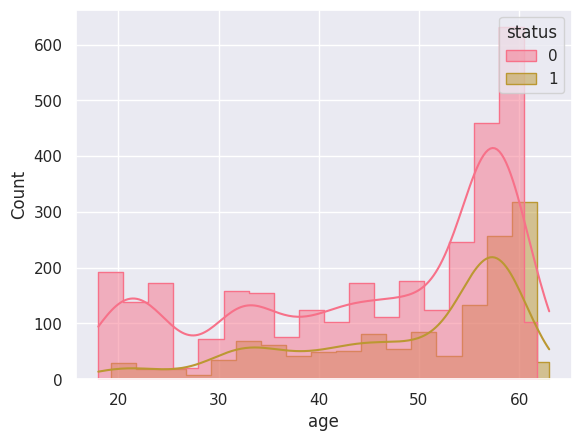

In [ ]:
sns.histplot(data=df, x='age', hue='status', element='step', multiple='dodge', kde=True)
plt.show()

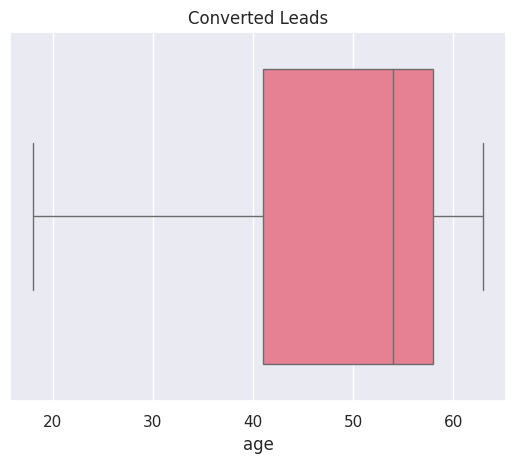

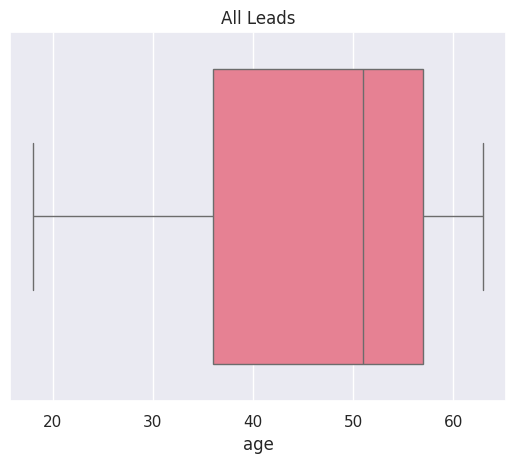

In [ ]:
sns.boxplot(data=status1_df,x="age")
plt.title('Converted Leads')
plt.show()
sns.boxplot(df,x="age")
plt.title('All Leads')
plt.show()

**Observation:** we can see the median age of the converted leads is higher than the sample. The interquartile range is smaller in the converted leads.

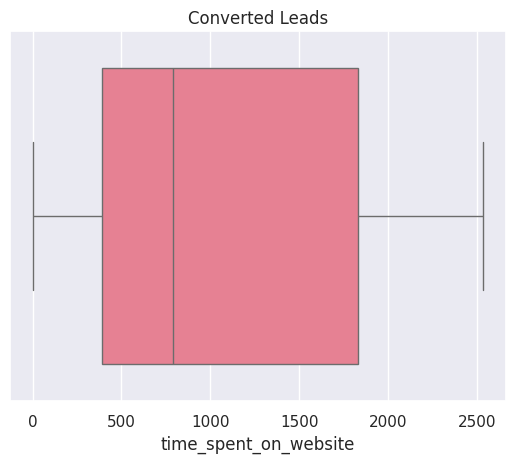

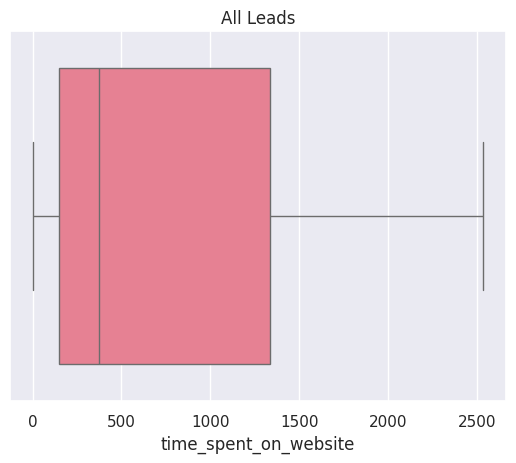

In [ ]:
sns.boxplot(data=status1_df,x="time_spent_on_website")
plt.title('Converted Leads')
plt.show()
sns.boxplot(data=df,x="time_spent_on_website")
plt.title('All Leads')
plt.show()

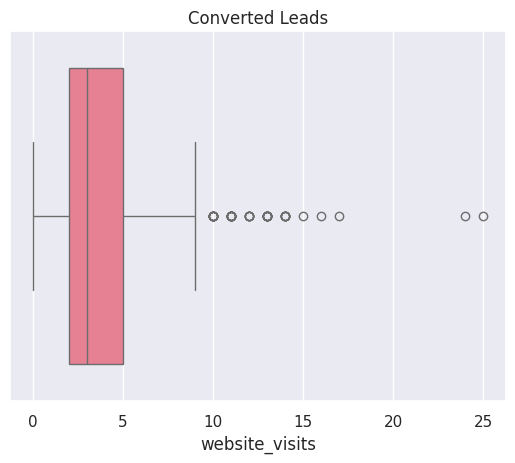

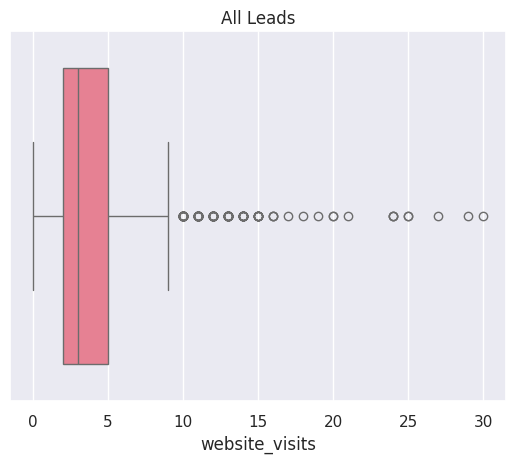

In [ ]:
sns.boxplot(data=status1_df,x="website_visits")
plt.title('Converted Leads')
plt.show()
sns.boxplot(data=df,x="website_visits")
plt.title('All Leads')
plt.show()

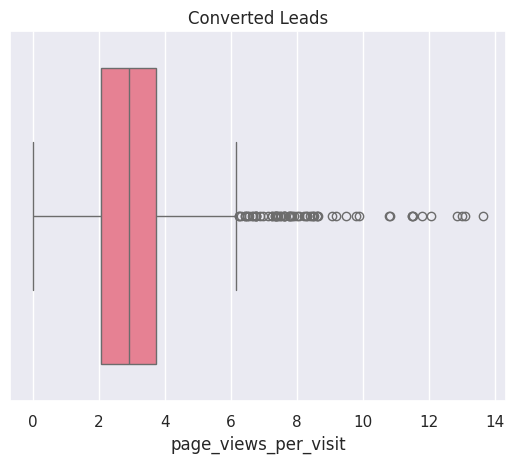

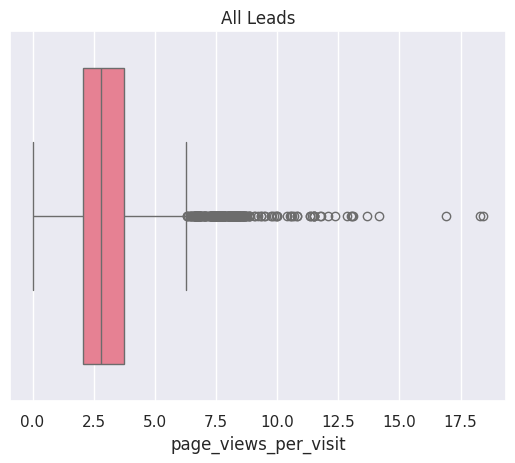

In [ ]:
sns.boxplot(data=status1_df,x="page_views_per_visit")
plt.title('Converted Leads')
plt.show()
sns.boxplot(data=df,x="page_views_per_visit")
plt.title('All Leads')
plt.show()

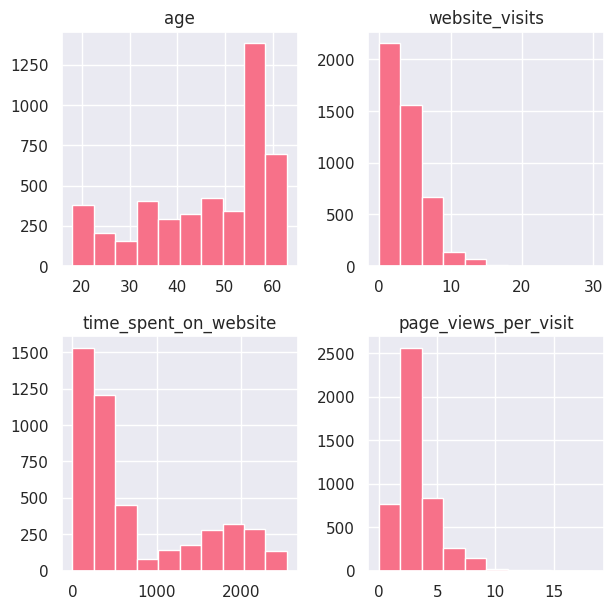

In [ ]:
df[num_cols].hist(figsize = (7, 7))

plt.show()

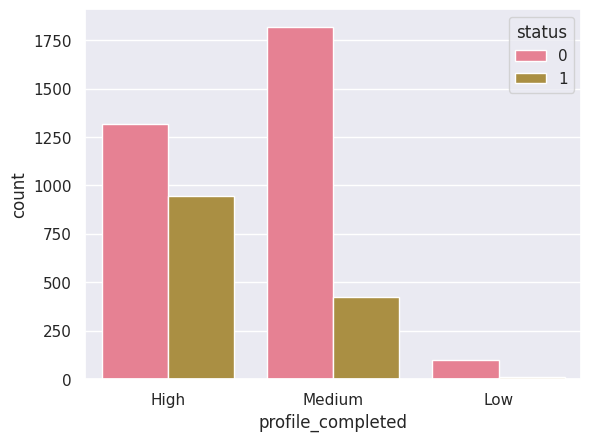

In [ ]:
sns.countplot(df,x='profile_completed',hue="status")
plt.show()

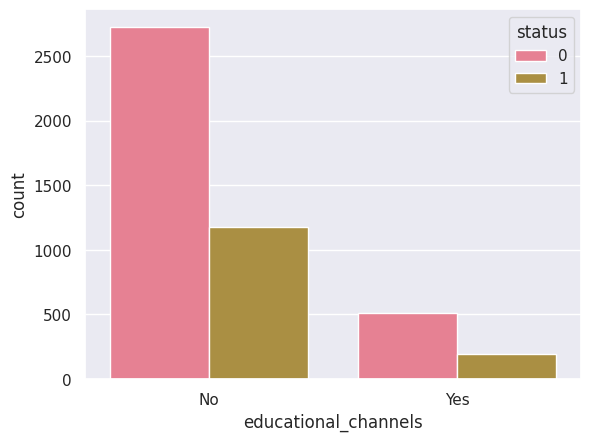

In [ ]:
sns.countplot(df,x='educational_channels',hue="status")
plt.show()

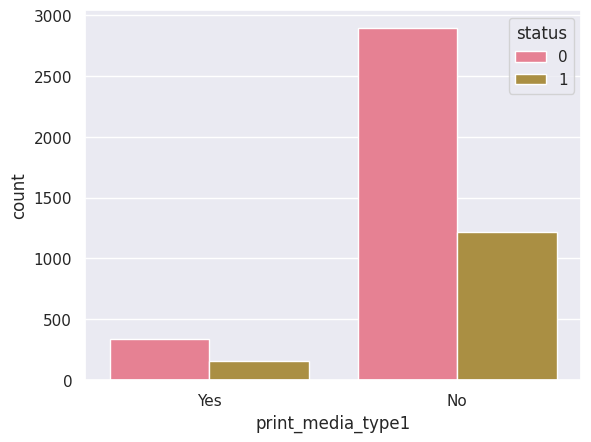

In [ ]:
sns.countplot(df,x='print_media_type1',hue="status")
plt.show()

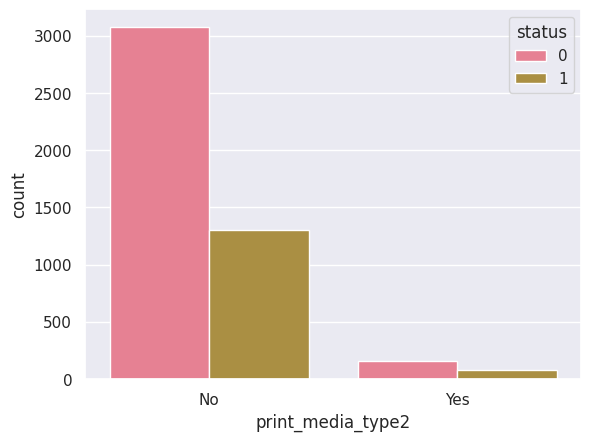

In [ ]:
sns.countplot(df,x='print_media_type2',hue="status")
plt.show()

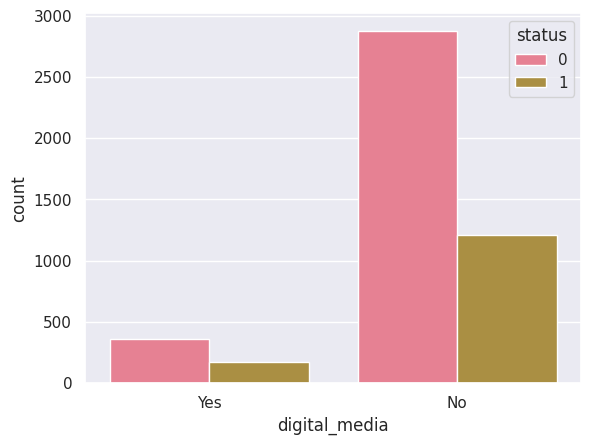

In [ ]:
sns.countplot(df,x='digital_media',hue="status")
plt.show()

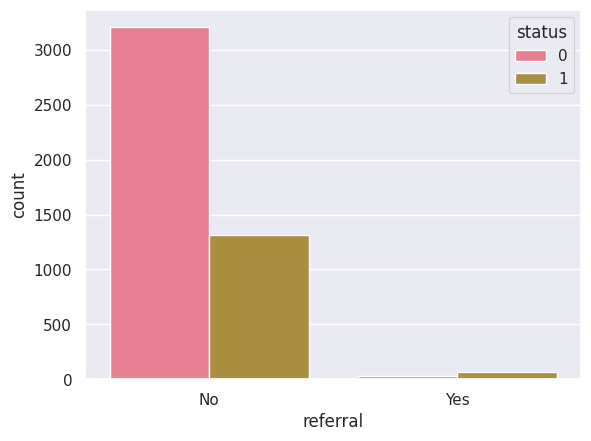

In [ ]:
sns.countplot(df,x='referral',hue="status")
plt.show()

<ipython-input-53-b547eaa8dce0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


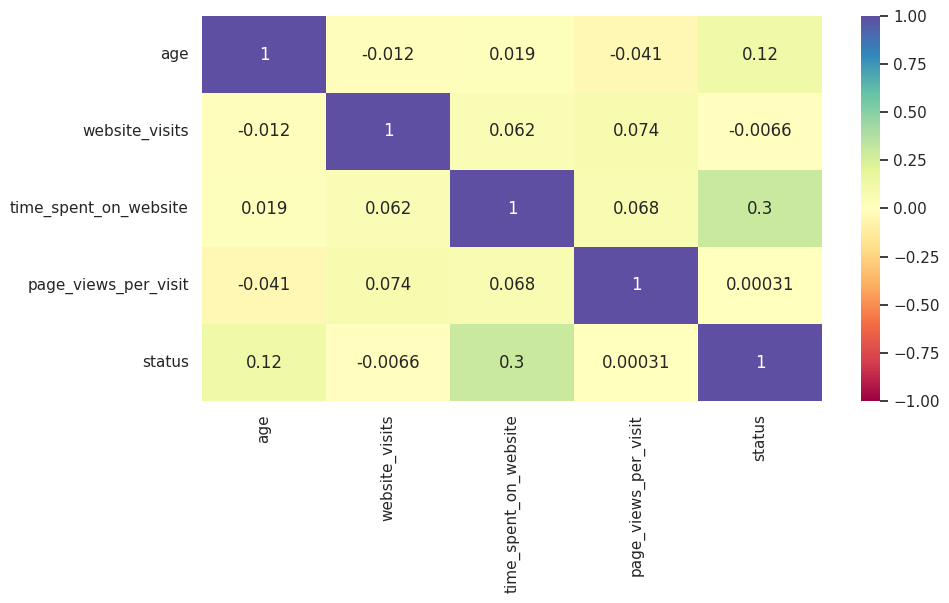

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations:** we can see there is no significant correlation between the numerical variables

#  Data Preprocessing


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,status_Ob,media_type_all
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1,1,"Newspaper, Digital"
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0,0,Edu_Channel
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0,0,Digital
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1,1,Unknown
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0,0,Unknown


In [ ]:
df = df.drop(['ID', 'website_visits', 'page_views_per_visit', 'status_Ob', 'media_type_all'] , axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    4612 non-null   int64 
 1   current_occupation     4612 non-null   object
 2   first_interaction      4612 non-null   object
 3   profile_completed      4612 non-null   object
 4   time_spent_on_website  4612 non-null   int64 
 5   last_activity          4612 non-null   object
 6   print_media_type1      4612 non-null   object
 7   print_media_type2      4612 non-null   object
 8   digital_media          4612 non-null   object
 9   educational_channels   4612 non-null   object
 10  referral               4612 non-null   object
 11  status                 4612 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 432.5+ KB


## Building a Decision Tree model

In [ ]:
# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['current_occupation' , 'first_interaction' , 'profile_completed' , 'last_activity']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)


In [ ]:
# Mapping values
dict_newspaper = {'Yes': 1, 'No': 0}
dict_magazine = {'Yes': 1, 'No': 0}
dict_digital = {'Yes': 1, 'No': 0}
dict_education = {'Yes': 1, 'No': 0}
dict_referral = {'Yes': 1, 'No': 0}

df['print_media_type1'] = df['print_media_type1'].map(dict_newspaper)
df['print_media_type2'] = df['print_media_type2'].map(dict_magazine)
df['digital_media'] = df['digital_media'].map(dict_digital)
df['educational_channels'] = df['educational_channels'].map(dict_education)  # Corrected column name
df['referral'] = df['referral'].map(dict_referral)

In [ ]:
# Separating the target variable and other variables

Y = df.status

X = df.drop(['status'], axis = 1)

In [ ]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [ ]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

The model can make two types of predictions:


1.   Predicting the lead will convert into a paying customer but doesn't
2.   Predicting the lead will not convert into a paying customer but hte lead does

Which case is more important?

Predicting the lead will convert into a paying customer but doesn't. since in this particular case, if we predict the lead will convert the company will be putting resources and efforts that will be lost.


In [ ]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

## Model Performance evaluation and improvement

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.701, 1: 0.299}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.701, 1: 0.299}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



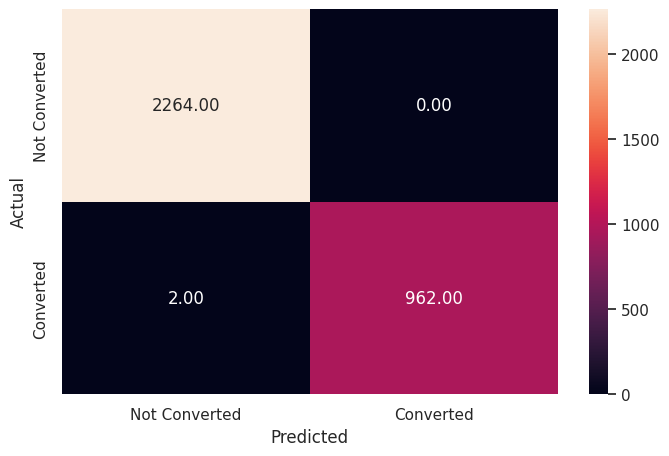

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:** the model is clearly overfitting as it has a score of 1 in all metrics.

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       971
           1       0.66      0.64      0.65       413

    accuracy                           0.79      1384
   macro avg       0.76      0.75      0.75      1384
weighted avg       0.79      0.79      0.79      1384



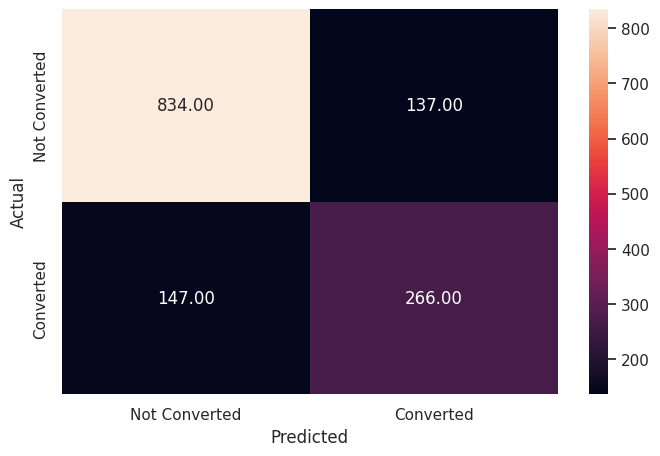

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.755101,0.751488,0.794798


**Observations:**

- The model is overfitting in the training data as it is giving a score of one in all metrics.
- Since the model is overfitting on the training data, it is not working very well on the test data.
- The precicion of the test data indicates that only 66% of predicted convert leads to paying customers were correctly identified, which is low.



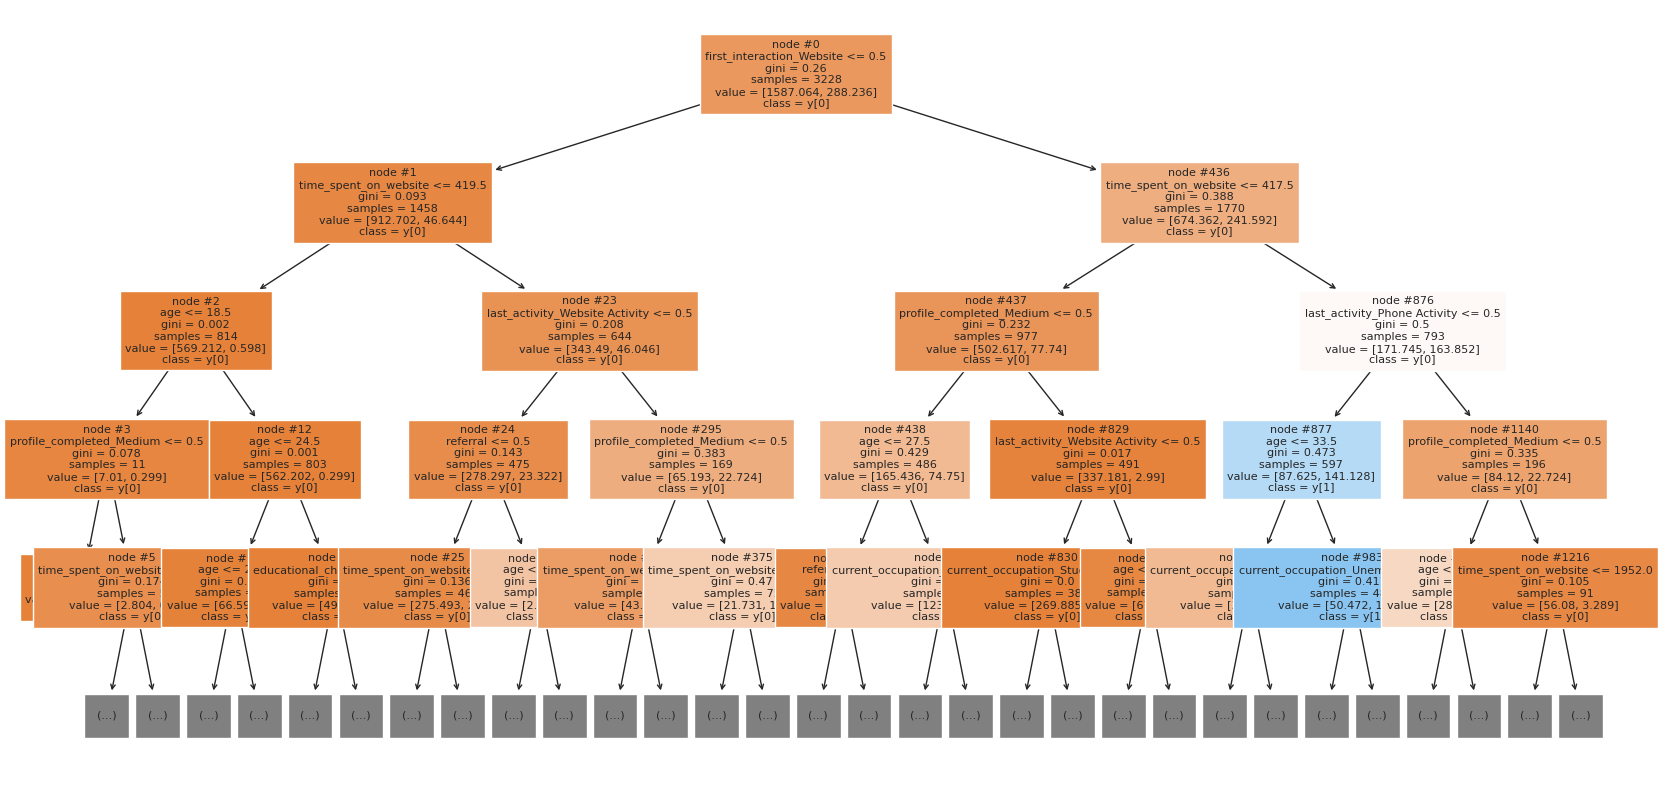

In [ ]:
features = list(X.columns)

plt.figure(figsize = (20, 10))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 8, node_ids = True, class_names = True)

plt.show()

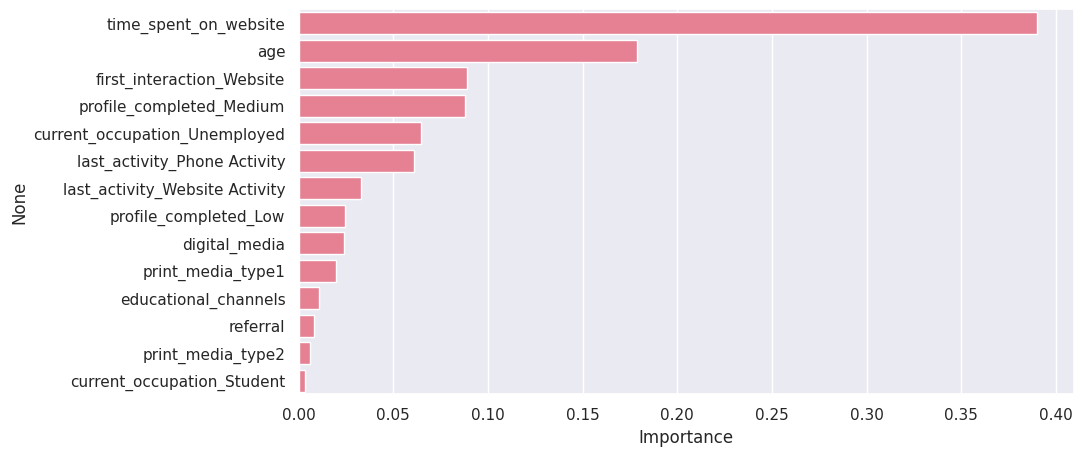

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 5))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

**Observations:**

- Time Spent onthe website is the most important feature, followed by age and first interaction via website.
- The people that have their profile completed "medium" are also important on the feature list.


In [ ]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.701, 1: 0.299}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.701, 1: 0.299}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2264
           1       0.79      0.49      0.61       964

    accuracy                           0.81      3228
   macro avg       0.80      0.72      0.74      3228
weighted avg       0.81      0.81      0.79      3228



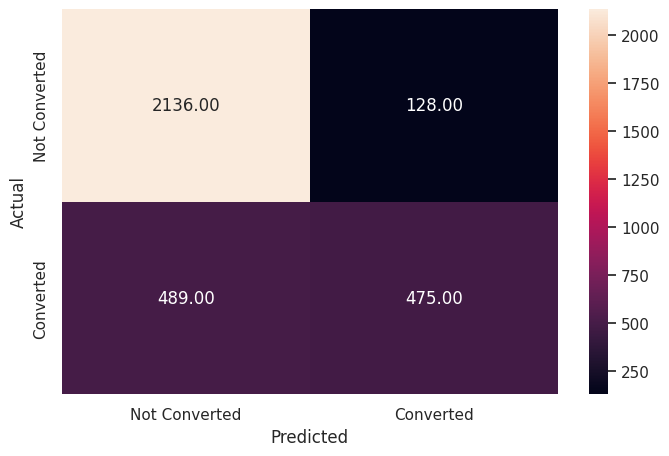

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       971
           1       0.80      0.47      0.59       413

    accuracy                           0.81      1384
   macro avg       0.80      0.71      0.73      1384
weighted avg       0.81      0.81      0.79      1384



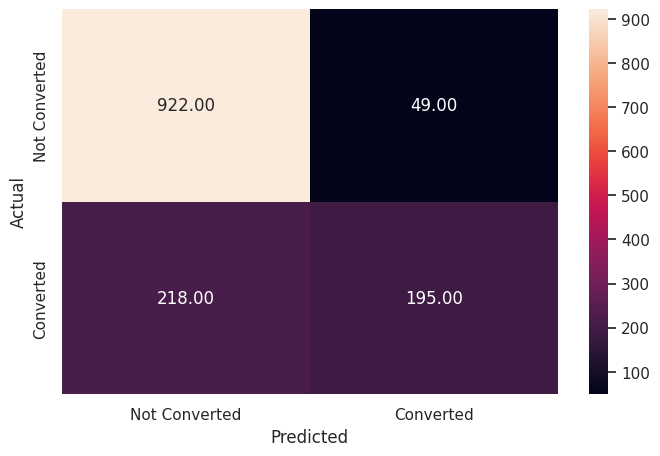

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.803976,0.710846,0.807081


**Observations:**

- The train model is now performing "worse" that means that is not overfitting anymore.
- The test model data didnt improved significantly, but there was an appreciable improvement, meaning it is better.
- The model is now predicting with accuracy of 80%.
- The precicion of the test data indicates that only 80% of predicted convert leads to paying customers were correctly identified. Meaning that the false positives were lowered to 20% andtherefore the resources that would go with it.

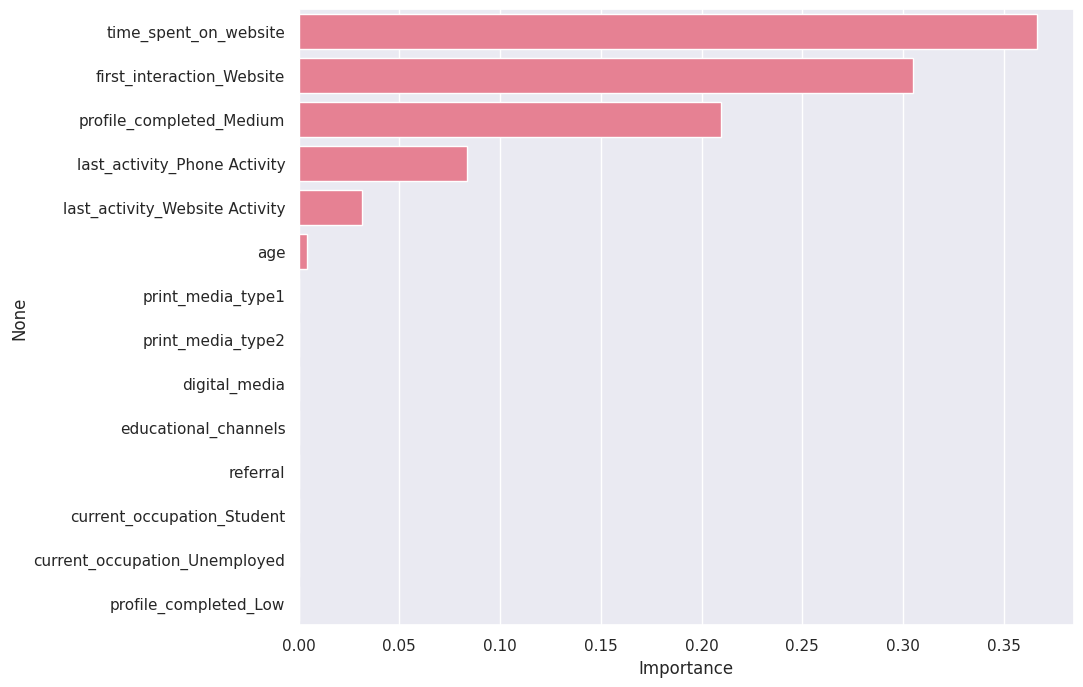

In [ ]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 8))

sns.barplot(x= importance_df.Importance, y= importance_df.index);

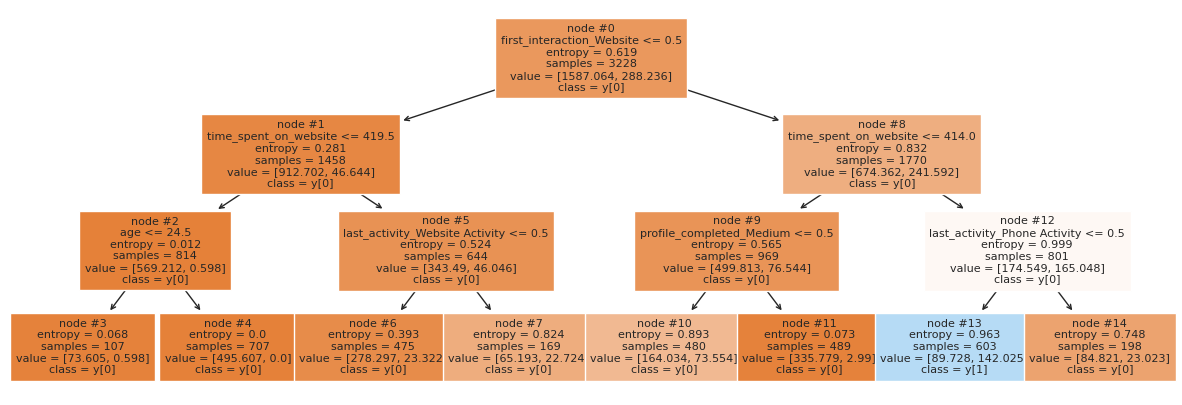

In [ ]:
features = list(X.columns)

plt.figure(figsize = (15, 5))

tree.plot_tree(dtree_estimator, max_depth = 4, feature_names = features, filled = True, fontsize = 8, node_ids = True, class_names = True)

plt.show()

**Observations:**

- We can see that the most impotant node determided by the tuned model is the first interaction being with the website.
- Age lost importance, but it was kept as a parameter.

This tuned tree is performing better but is not the best.

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.701, 1: 0.299}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.701, 1: 0.299}, random_state=1)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



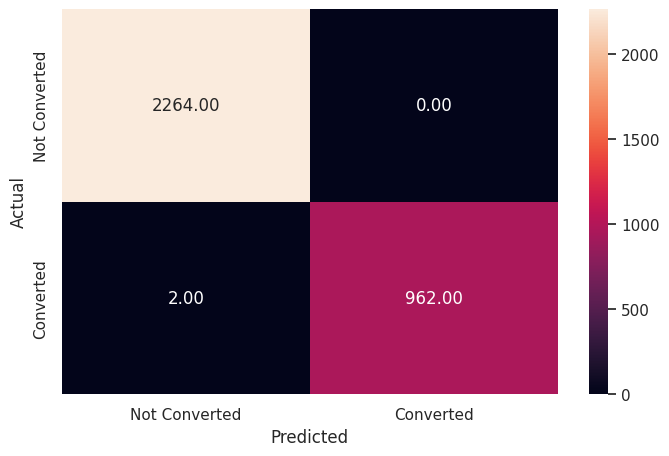

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:** the randon forest model is overfiting since it is giving us a score og 1 in all metrics

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       971
           1       0.75      0.69      0.72       413

    accuracy                           0.84      1384
   macro avg       0.81      0.80      0.80      1384
weighted avg       0.84      0.84      0.84      1384



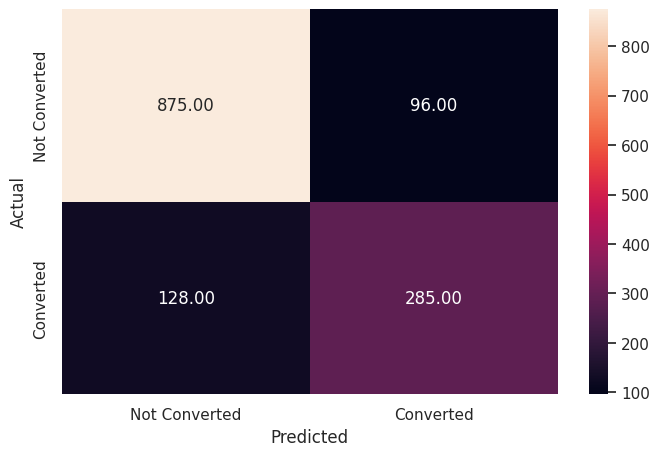

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.810207,0.795603,0.83815


**Observations:**
- Even though the training data is overfitting, theis model is the one that has worked the best.
- The presicion for converted (1) on the test data is 75% which is still not the best. we need that number higher.



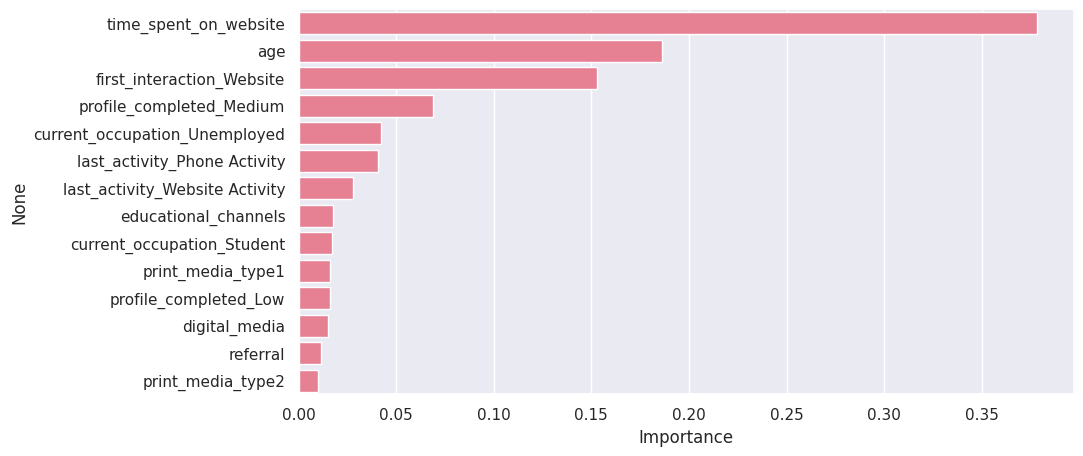

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 5))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

**Observation:** we can see there that the priority features are still "time spent on website", "age" and "first interaction wesite".

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.701, 1: 0.299}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.701, 1: 0.299}, max_features=0.9,
                       n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



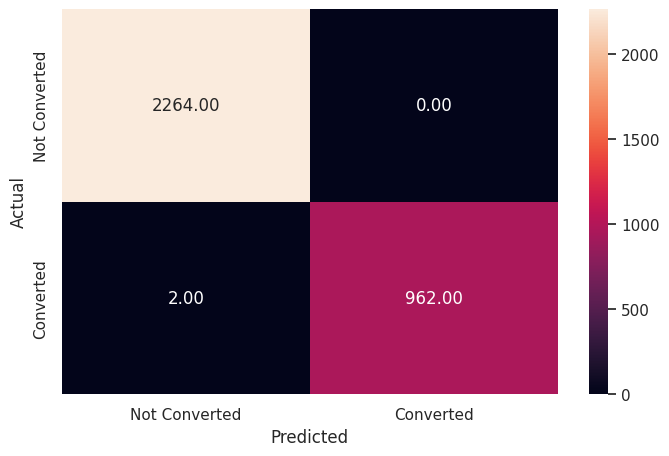

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       971
           1       0.74      0.70      0.72       413

    accuracy                           0.84      1384
   macro avg       0.81      0.80      0.80      1384
weighted avg       0.84      0.84      0.84      1384



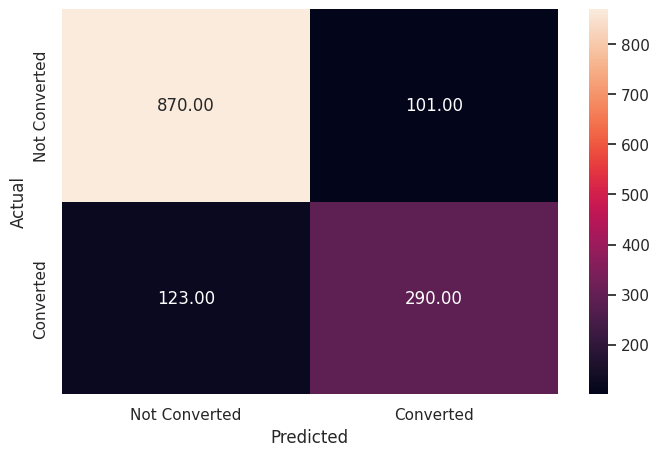

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.80891,0.799081,0.83815


<Axes: xlabel='Importance', ylabel='None'>

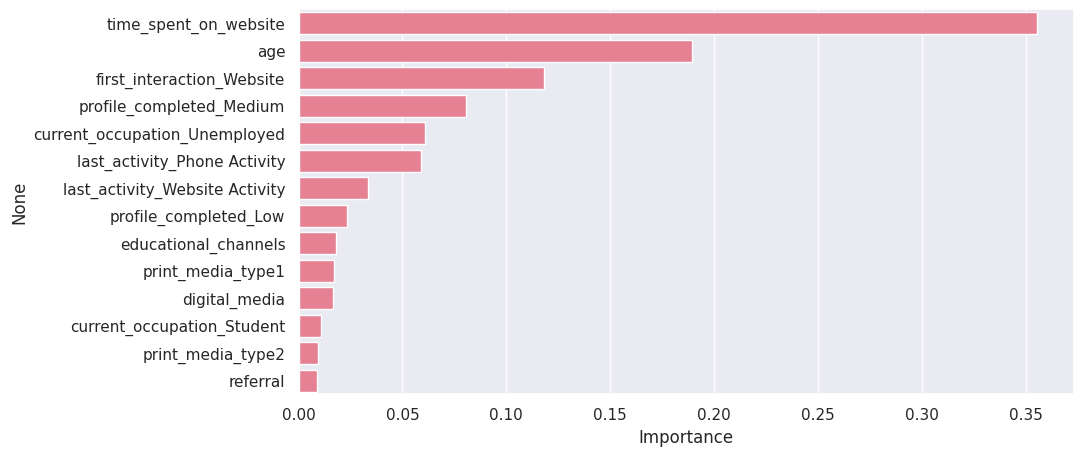

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 5))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

In [ ]:
# Choose the type of classifier
rf_estimator_tuned1 = RandomForestClassifier(class_weight = {0: 0.701, 1: 0.299}, random_state = 1)

# Grid of parameters to choose from
params_rf1 = {
          'n_estimators': [100, 200, 300],
          'max_depth': [2, 5, 10],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer1 = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned1, params_rf1, scoring = scorer1, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned1 = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned1.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.701, 1: 0.299}, max_depth=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2264
           1       0.97      0.64      0.77       964

    accuracy                           0.89      3228
   macro avg       0.92      0.82      0.85      3228
weighted avg       0.90      0.89      0.88      3228



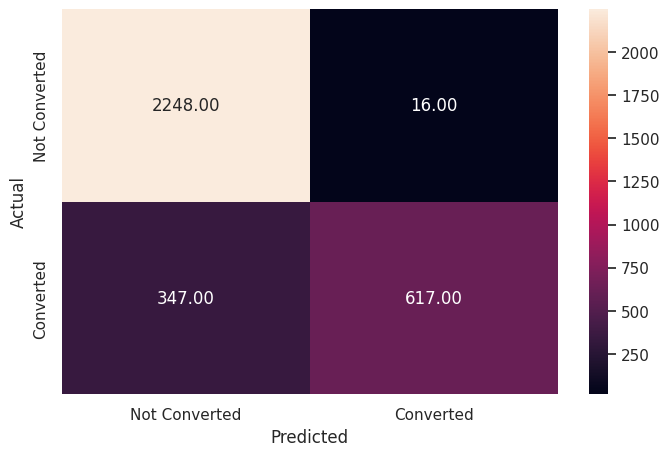

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned1 = rf_estimator_tuned1.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned1)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       971
           1       0.87      0.53      0.66       413

    accuracy                           0.84      1384
   macro avg       0.85      0.75      0.78      1384
weighted avg       0.84      0.84      0.82      1384



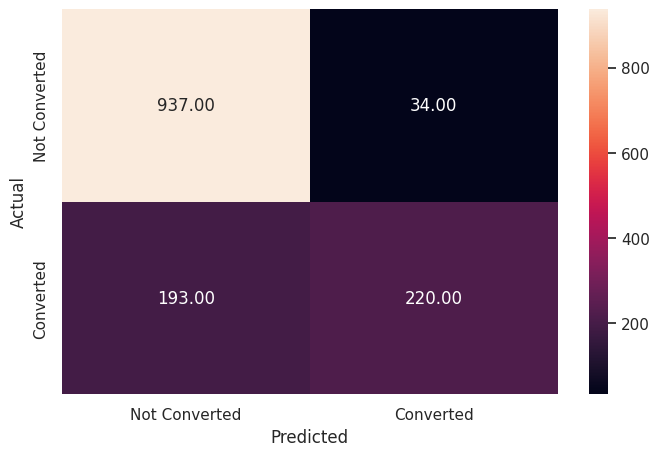

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned1 = rf_estimator_tuned1.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned1)

In [ ]:
rf_estimator_tuned_test1 = model_performance_classification(rf_estimator_tuned1, x_test, y_test)
rf_estimator_tuned_test1

,Precision,Recall,Accuracy
0,0.847673,0.748836,0.835983


<Axes: xlabel='Importance', ylabel='None'>

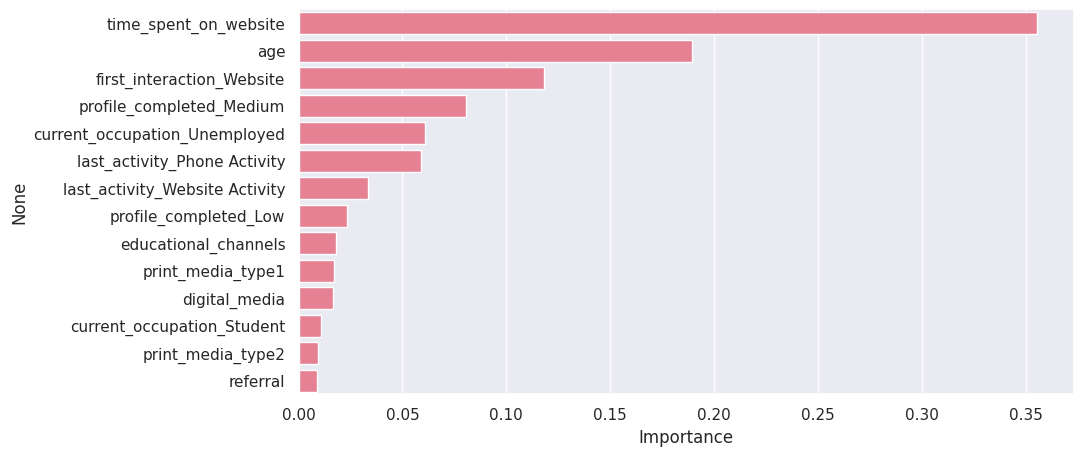

In [ ]:
# Plotting feature importance
importances1 = rf_estimator_tuned1.feature_importances_

columns1 = X.columns

importance_df1 = pd.DataFrame(importances1, index = columns1, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 5))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

## Actionable Insights and Recommendations

**Insights:**
- The precision for the model increased from 80.9% to 84.8% after the last tuning. The increase in precision tells us that the model is now making fewer false positive predictions and therefore the company will be spending less on unnecessary resources.
- Since the company will be putting resources on following up on the predicted converted leads, it is important to have the highest possible precision.
- Since the data is highly imbalanced, it usually has a bias toward the majority class in this case the not converted leads. Having a bias is never great, but in this case it does not affect us too much since our problem is more about the false positives than the true negatives.
- The recall decreased from 79.9% to 74.9% due to the increase in precision.
The accuracy remained relatively stable, changing from 83.8% to 83.6% after tuning.

**Recommendations:**
- Throughout the modeling process we saw that the time spent on the website was one of the most important parameters. Therefore this should be something that should be monitored as it is a big indicator of whether the lead will convert to a paying customer or not.
- The second most important feature is the age of the lead, the average age of lead converted to paying customers is 48.66 (interquartile range from 41 to 58 years old). That gives us a better perspective on the age demographic the company should be focusing on.
- The third most important feature is the first interaction via a website as opposed to via Mobile App. The company needs to focus on the leads whose first interaction was over the website since it is most likely the interaction was more intentional rather than just a leisure scroll on their phones.
- Overall, the data is extremely unbalanced with only 29.9 % of converted leads. The models will unfortunately be biased toward the majority class in this case not converted to paying customers. The company should continue to collect the data in order to better the predictions.
